In [1]:
from mapper import mapProperty, mpNoRank, mpNoRankWType, mpRank, mpRankWType
import csv
import pandas as pd
import numpy
from sklearn.utils import resample

from gensim.corpora import WikiCorpus

In [185]:
def lDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

def check_correctness(data, mapping):
    result_map = {}
    for item in list(data['nama kolom']):
        if(mapping[item] == data['property'][data.loc[data['nama kolom'] == item].index[0]]):
            result_map[item] = 1
        elif(mapping[item] == '' and pd.isnull(data['property'][data.loc[data['nama kolom'] == item].index[0]])):
            result_map[item] = 1
        else:
            result_map[item] = 0
    return result_map

def countCorrect(map_result):
    return sum(map_result.values())

def search_best_thresh(data, dataset, datatype):
    res_map = {}
    for y in range(4):
        for x in range(10):
            _, mapLabel = mpRank(dataset, (x / 10.0) + y)
            cor_map = check_correctness(data, mapLabel)
            res_map['{}.{}'.format(y,x)] = countCorrect(cor_map)
    return res_map

def precision(nums_correct, total):
    return nums_correct / total

def mAvePrecision(relevance_list, res):
    precision_score = []
    nums_correct = 0
    total = 0
    for elem in res:
        total = total + 1
        if(elem['_source']['label'] in relevance_list):
            nums_correct = nums_correct + 1
            
        precision_score.append(precision(nums_correct, total))
    return mean(precision_score)

In [186]:
df_downsampled = pd.read_csv("data/testing/prop_dataset_sampling.csv", encoding='latin-1')
df_downsampled

,nama kolom,tipe data,property,isnull
0,status penyelenggara,String,NaN,True
1,teknologi informasi,Quantity,NaN,True
2,speisalis jiwa psikiatri,Quantity,NaN,True
3,radiografer,Quantity,NaN,True
4,drg spesialis radiologi,Quantity,NaN,True
5,rawat jalan,Quantity,NaN,True
6,progkes,Quantity,NaN,True
7,spesialis radiologi,Quantity,NaN,True
8,drg spesialis anak,Quantity,NaN,True
9,drg spesialis konservasi,Quantity,NaN,True


In [55]:
# df['isnull'] = pd.isnull(df['property'])
# df_majority = df[df['isnull'] == True]
# df_minority = df[df['isnull'] == False]

# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=66,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# df_downsampled.to_csv('data/testing/prop_dataset_sampling.csv', index=False)
# # Display new class counts
# df_downsampled

In [187]:
dataset = list(df_downsampled['nama kolom'])
datatype = list(df_downsampled['tipe data'])

In [7]:
search_best_thresh(df_downsampled, dataset, datatype)

Connected to ES Service


KeyError: 'teknologi informasi'

In [197]:
_, mapLabel = mpNoRankWTypeSimHead(dataset, datatype)
mapLabel

Connected to ES Service


C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


{'status penyelenggara': '',
 'teknologi informasi': '',
 'speisalis jiwa psikiatri': 'jumlah penduduk',
 'radiografer': '',
 'drg spesialis radiologi': '',
 'rawat jalan': '',
 'progkes': '',
 'spesialis radiologi': '',
 'drg spesialis anak': 'jumlah anak',
 'drg spesialis konservasi': '',
 'simrs': '',
 'kesmas lain': '',
 'ekg': '',
 'radioterapis': '',
 'mesin anestesi': '',
 'perawat komunitas': '',
 'latitude': 'koordinat tempat',
 'spesialis bedah': '',
 'autoclav': '',
 'igd': '',
 'perawat bedah': '',
 'fasilitas': 'mempunyai fasilitas',
 'dokter sub spesialis': '',
 'epidemiologi': '',
 'biostatik': '',
 'longitude': 'koordinat tempat',
 'drg spesialis bedah mulut': '',
 'terapi okupasi': '',
 'humas': '',
 'layanan unggulan': '',
 'tenaga non kes': 'jumlah korban luka',
 'swasta': '',
 'tt bayi lahir': 'tempat lahir',
 'spesialis rekam medik': '',
 'teknisi kardiovaskular': '',
 'apoteker': '',
 'toi': '',
 'ambulan': '',
 'dokter gigi': '',
 'los': '',
 'drg spesialis penya

In [198]:
_, mapLabel = mpNoRankWTypeSimHead(dataset, datatype)
cor_map = check_correctness(df_downsampled, mapLabel)
list(cor_map.values())

Connected to ES Service


C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [200]:
list(mapLabel.values())

['',
 '',
 'jumlah penduduk',
 '',
 '',
 '',
 '',
 '',
 'jumlah anak',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'koordinat tempat',
 '',
 '',
 '',
 '',
 'mempunyai fasilitas',
 '',
 '',
 '',
 'koordinat tempat',
 '',
 '',
 '',
 '',
 'jumlah korban luka',
 '',
 'tempat lahir',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'koordinat ujung utara',
 'jumlah anak',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'P2859',
 'P2051',
 '',
 '',
 '',
 '',
 '',
 '',
 'alamat',
 'nomor jalan',
 'alamat',
 'alamat',
 'bentuk feminim label',
 'distribusi',
 'terletak di wilayah administrasi',
 'manajer/direktur',
 'surel',
 'nomor faks',
 'jenis penglistrikan',
 'jenis unit untuk atribut ini',
 'jenis sinyal pancaran',
 'jenis kompresor',
 'jenis kompresor',
 'jenis rujukan',
 '',
 'Jumlah',
 'jumlah pegawai',
 'jumlah mahasiswa',
 'jumlah mahasiswa',
 'jumlah korban hilang',
 'jumlah korban tewas',
 'kategori mengandung',
 'terletak di wilayah administrasi',
 'kepala negara',
 'k

In [7]:
import multiprocessing
import logging
import os.path
import sys
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import csv
import pandas as pd
from wikimedia import searchEntity, searchObjWProperty, searchProperty
from dateutil.parser import parse
import operator
from indexer import connect_elasticsearch, search
import logging
import json

In [8]:
namaFileModel = "data/dump/w2vec_wiki_id_case"
model = Word2Vec.load(namaFileModel)

In [9]:
model.most_similar('murid')

C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('muridnya', 0.778740406036377),
 ('Murid', 0.6802961230278015),
 ('siswa', 0.673414945602417),
 ('gurunya', 0.6555808782577515),
 ('siswanya', 0.6376014947891235),
 ('siswi', 0.6023858785629272),
 ('santrinya', 0.5943955183029175),
 ('guru', 0.5881454348564148),
 ('santri', 0.5834325551986694),
 ('mahasiswanya', 0.5371953248977661)]

In [212]:
sim = model.similarity("update", "termutakhir")
sim

C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.19916141

In [6]:
def mpNoRankWTypeSimHead(header_list, type_list, thresh=0):
    logging.basicConfig(level=logging.ERROR)
    es = connect_elasticsearch()

    result = {}
    resultLabel = {}
    for elem in header_list:
        elem = elem.replace('_', ' ')
        search_object = {
            "from" : 0, 
            "size" : 100,
            "query": {
                "bool": {
                    "must": [
                        {
                            "term": {"data type": type_list[header_list.index(elem)]}
                        },
                        {
                            "bool": {
                                "should": [
                                    {"match": {"aliasId": elem}},
                                    {"match": {"aliasEn": elem}}
                                ]
                            }
                        }
                    ]
                }
            }
        }
        
        res = search(es, property_index, json.dumps(search_object))['hits']['hits']
        if(len(res) > 0):
            temp = mpNoRankWTypeSim(res, elem)
            if(temp):
                result[elem] = temp['_source']['id']
                resultLabel[elem] = temp['_source']['labelId']
            else:
                result[elem] = ''
                resultLabel[elem] = ''
        else:
            result[elem] = ''
            resultLabel[elem] = ''
    return result, resultLabel

In [196]:
def mpNoRankWTypeSimHead(header_list, type_list, thresh=0):
    logging.basicConfig(level=logging.ERROR)
    es = connect_elasticsearch()

    result = {}
    resultLabel = {}
    for elem in header_list:
        elem = elem.replace('_', ' ')
        search_object = {
            "from" : 0, 
            "size" : 100,
            "query": {
                "bool": {
                    "must": [
                        {
                            "term": {"data type": type_list[header_list.index(elem)]}
                        },
                        {
                            "bool": {
                                "should": [
                                    {"match": {"aliasId": elem}},
                                    {"match": {"aliasEn": elem}}
                                ]
                            }
                        }
                    ]
                }
            }
        }
        
        res = search(es, property_index, json.dumps(search_object))['hits']['hits']
        if(len(res) > 0):
            words = elem.split()
            for item in res:
                sim_score = 0
                label = item['_source']['labelId']
                alias = item['_source']['aliasId']
                lwords = label.split()
                for n in range(len(words)):
                    try:
                        sim_score = sim_score + model.similarity(words[n].lower(), lwords[n].lower())
                    except:
                        pass

                for alt in alias:
                    temp = 0
                    alt_words = alt.split()
                    for n in range(len(words)):
                        try:
                            temp = temp + model.similarity(words[n].lower(), alt_words[n].lower())
                        except:
                            pass
                    if(temp > sim_score):
                        sim_score = temp
                item['_score'] = sim_score
                newlist = sorted(res, key=lambda k: k['_score'], reverse=True)
                result[elem] = newlist[0]['_source']['id']
                resultLabel[elem] = newlist[0]['_source']['labelId']
        else:
            result[elem] = ''
            resultLabel[elem] = ''
    return result, resultLabel

In [5]:
property_index = 'wd_property'
entity_index = 'wd_entity'
property_doc_type = 'members'
elem = 'nomor'.lower()
result = []
resultLabel = []

logging.basicConfig(level=logging.ERROR)
es = connect_elasticsearch()

search_object = {
    "from" : 0, 
    "size" : 100,
    "query": {
        "bool": {
            "must": [
                {
                    "term": {"data type": "String"}
                },
                {
                    "bool": {
                        "should": [
                            {"match": {"aliasEn": elem}},
                            {"match": {"aliasId": elem}}
                        ]
                    }
                }
            ]
        }
    }
}

res = search(es, property_index, json.dumps(search_object))['hits']['hits']
res

Connected to ES Service


[{'_index': 'wd_property',
  '_type': 'members',
  '_id': '6mP_mGkBTNfC7kYMVoZV',
  '_score': 4.003627,
  '_source': {'labelId': 'nomor',
   'id': 'P670',
   'aliasId': ['nomor'],
   'descriptionId': '',
   'data type': 'String',
   'labelEn': 'street number',
   'aliasEn': ['house number', 'housenumber', 'street number'],
   'descriptionEn': 'number in the street address. To be used as a qualifier of Property:P669 "located on street"'}},
 {'_index': 'wd_property',
  '_type': 'members',
  '_id': '_WP_mGkBTNfC7kYMSIXs',
  '_score': 3.7107337,
  '_source': {'labelId': 'nomor edisi',
   'id': 'P393',
   'aliasId': ['nomor edisi'],
   'descriptionId': '',
   'data type': 'String',
   'labelEn': 'edition number',
   'aliasEn': ['edition number'],
   'descriptionEn': 'number of this edition (first, second, ... as 1, 2, ...) of a book or event'}},
 {'_index': 'wd_property',
  '_type': 'members',
  '_id': 'uGP_mGkBTNfC7kYMU4YU',
  '_score': 3.7107337,
  '_source': {'labelId': 'Nomor galangan',

In [210]:
result = ''
words = elem.split()
for item in res:
    sim_score = 0
    label = item['_source']['labelId']
    alias = item['_source']['aliasId']
    lwords = label.split()
    for n in range(len(words)):
        try:
            sim_score = sim_score + model.similarity(words[n].lower(), lwords[n].lower())
        except:
            pass
    
    for alt in alias:
        temp = 0
        alt_words = alt.split()
        for n in range(len(words)):
            try:
                temp = temp + model.similarity(words[n].lower(), alt_words[n].lower())
            except:
                pass
        if(temp > sim_score):
            sim_score = temp
    print('{} {}'.format(sim_score, label))
    item['_score'] = sim_score

1.0000001192092896 nomor telepon
0.4369090870022774 kode telepon negara
1.2244391739368439 kode telepon lokal


C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


In [204]:
newlist = sorted(res, key=lambda k: k['_score'], reverse=True) 
newlist

[{'_index': 'wd_property',
  '_type': 'members',
  '_id': 't2P_mGkBTNfC7kYMpIoj',
  '_score': 1.3628566265106201,
  '_source': {'labelId': 'nomor jalan',
   'id': 'P1824',
   'aliasId': ['nomor rute', 'nomor jalan'],
   'descriptionId': 'nomor yang ditetapkan untuk bentangan jalan umum',
   'data type': 'String',
   'labelEn': 'road number',
   'aliasEn': ['highway number', 'shield number', 'road number'],
   'descriptionEn': 'number assigned to a stretch of public roadway'}},
 {'_index': 'wd_property',
  '_type': 'members',
  '_id': 'omMDmWkBTNfC7kYMjJvb',
  '_score': 1.0,
  '_source': {'labelId': 'alamat',
   'id': 'P6375',
   'aliasId': ['P6375', 'alamat'],
   'descriptionId': '',
   'data type': 'String',
   'labelEn': 'located at street address',
   'aliasEn': ['address', 'physical address', 'located at street address'],
   'descriptionEn': 'full street address that the subject is located at. Include building number through to post code, use also P669 if the street is known as a s

In [113]:
len(elem.split())

3

In [186]:
def findStrict(searchResult, source, query):
    result = ''
    for item in searchResult:
        if(source == 'labelId'):
            flag = False
            alias = item['_source'][source]
            for alt in alias:
                if(query == alt):
                    result = item
                    flag = True
                    break
            if(flag):
                break
        elif(source == 'aliasId'):
            flag = False
            alias = item['_source'][source]
            for alt in alias:
                for word in alt.split():
                    if(query == word):
                        result = item
                        flag = True
                        break
                if(flag):
                    break
            if(flag):
                break
            
    return result

In [143]:
def findSim(searchResult, split_list):
    result = ''
    sim_score = 0
    for item in searchResult:
        label = item['_source']['labelId']
        lwords = label.split()
        temp = 0
        for n in range(len(split_list)):
            try:
                temp = temp + model.similarity(split_list[n], lwords[n])
            except:
                pass
        if(temp > sim_score):
            sim_score = temp
            result = item
    return result

In [177]:
def mpNoRankWTypeSim(search_result, target):
    words = target.split()
    for word in words:
        result = findStrict(search_result, 'labelId', word.lower())
        if(result):
            break
    if(not result):
        for word in words:
            result = findStrict(search_result, 'aliasId', word.lower())
            if(result):
                break
    if(not result):
        if(len(words) > 1):
            result = findSim(search_result, words)
    return result

In [191]:
mpNoRankWTypeSim(res, elem)

{'_index': 'wd_property',
 '_type': 'members',
 '_id': 'aEsxlGkBqo8vPRLT3X8e',
 '_score': 3.1831853,
 '_source': {'labelId': 'jumlah penutur',
  'id': 'P1098',
  'aliasId': ['jumlah penutur'],
  'descriptionId': 'jumlah orang yang menuturkan suatu bahasa',
  'data type': 'Quantity',
  'labelEn': 'number of speakers',
  'aliasEn': ['number of speakers'],
  'descriptionEn': 'number of people who speak a language'}}

In [39]:
words = elem.split()
result = ''
if(len(words) > 1):
    sim_score = 0
    for item in res:
        label = item['_source']['labelId']
        alias = item['_source']['aliasId']
        if(words[1] == label):
            result = words[1]
            break
        flag = False
        for alt in alias:
            if(words[1] == alt):
                result = words[1]
                flag = True
                break
        if(flag):
            break
        try:
            lwords = label.split()
            for lword in lwords:
                temp = model.similarity(words[1], lword)
                if(temp > sim_score):
                    sim_score = temp
                    result = item
        except:
            pass
result

C:\Users\gibra\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


{'_index': 'wd_property',
 '_type': 'members',
 '_id': 'hjLIj2kBEeZl-BE9dk22',
 '_score': 3.0534286,
 '_source': {'labelId': 'luas wilayah',
  'id': 'P2046',
  'aliasId': ['luas', 'luas wilayah'],
  'descriptionId': 'luas suatu tempat dari suatu objek',
  'data type': 'Quantity',
  'labelEn': 'area',
  'aliasEn': ['surface', 'surface area', 'acreage', 'total area', 'area'],
  'descriptionEn': 'area occupied by an object'}}

In [208]:
property_index = 'wd_property'
entity_index = 'wd_entity'
property_doc_type = 'members'
elem = 'telepon humas'
result = []
resultLabel = []

logging.basicConfig(level=logging.ERROR)
es = connect_elasticsearch()

if(len(elem.split()) > 1):
    temp = elem.split()
    search_object = {
        "query": {
            "bool": {
                "filter": {
                    "term": {"data type": "String"}
                },
                "should": {
                    "match": {"alias": temp[0]}
                },
                ""
            }
        }
    }
else:
    search_object = {
        "query": {
            "bool": {
                "filter": {
                    "term": {"data type": "WikibaseItem"}
                },
                "should": {
                    "match": {"alias": "kecamatan"}
                }
            }
        }
    }

res = search(es, property_index, json.dumps(search_object))['hits']['hits']
res

SyntaxError: invalid syntax (<ipython-input-208-daae68ea4c7b>, line 23)

In [86]:
property_index = 'wd_property'
entity_index = 'wd_entity'
property_doc_type = 'members'
elem = 'jumlah'
result = {}
resultLabel = {}

logging.basicConfig(level=logging.ERROR)
es = connect_elasticsearch()

search_object = {
    "query": {
        "bool": {
            "filter": {
                "term": {"data type": 'Quantity'}
            },
            "should": {
                "match": {
                    "alias": {
                        "query": elem
                    }
                }
            }
        }
    }
}

res = search(es, property_index, json.dumps(search_object))['hits']['hits']
print(res)
if(len(res) > 0):
    found = False
    for cand in res:
        if(elem.lower() in cand['_source']['label']):
            result[elem] = cand['_source']['id']
            resultLabel[elem] = cand['_source']['label']
            found = True
            break
    if(not found):
        for cand in res:
            if(elem.lower() in cand['_source']['alias']):
                result[elem] = cand['_source']['id']
                result[elem] = cand['_source']['label']
                found = True
                break
    if(not found):
        split = elem.split()
        for word in split:
            for cand in res:
                for candword in cand['_source']['alias']:
                    if(word.lower() in candword):
                        result[elem] = cand['_source']['id']
                        resultLabel[elem] = cand['_source']['label']
                        found = True
                        break
                if(found):
                    break
            if(found):
                break
    if(not found):
        for cand in res:
            if(elem.lower() in cand['_source']['description']):
                result[elem] = cand['_source']['id']
                resultLabel[elem] = cand['_source']['label']
                found = True
                break
    if(not found):
        minDist = 10000
        candItem = None
        temp = 0
        for cand in res:
            for alt in cand['_source']['alias']:
                temp = min(minDist, lDistance(elem.lower(), alt))
            if(temp < minDist):
                candItem = cand
                minDist = temp
        
        if(minDist < 4):
            result[elem] = candItem['_source']['id']
            resultLabel[elem] = candItem['_source']['label']
resultLabel

Connected to ES Service
[{'_index': 'wd_property', '_type': 'members', '_id': 'awhUdWkBzKDMpPSRInMX', '_score': 1.6329932, '_source': {'label': 'jumlah anak', 'id': 'P1971', 'alias': ['jumlah anak'], 'description': '', 'data type': 'Quantity'}}, {'_index': 'wd_property', '_type': 'members', '_id': 'ZwhUdWkBzKDMpPSRB3EB', '_score': 1.5118579, '_source': {'label': 'jumlah kursi', 'id': 'P1342', 'alias': ['jumlah kursi'], 'description': 'banyaknya kursi/anggota dewan', 'data type': 'Quantity'}}, {'_index': 'wd_property', '_type': 'members', '_id': 'IghUdWkBzKDMpPSRQnVQ', '_score': 1.5118579, '_source': {'label': 'jumlah musim', 'id': 'P2437', 'alias': ['jumlah musim'], 'description': 'jumlah musim suatu seri televisi atau radio', 'data type': 'Quantity'}}, {'_index': 'wd_property', '_type': 'members', '_id': 'oghTdWkBzKDMpPSR_HBt', '_score': 1.5, '_source': {'label': 'Jumlah', 'id': 'P1114', 'alias': ['Jumlah'], 'description': '', 'data type': 'Quantity'}}, {'_index': 'wd_property', '_typ

{'jumlah': 'jumlah anak'}

Yang perlu di tes:
<ul>
<li>biasa+tfidf</li>
<li>3gram+tfidf</li>
<li>4gram+tfidf</li>
<li>biasa+tf</li>
<li>3gram+tf</li>
<li>4gram+tf</li>
<li>biasa+tfidf+type</li>
<li>3gram+tfidf+type</li>
<li>4gram+tfidf+type</li>
<li>biasa+tf+type</li>
<li>3gram+tf+type</li>
<li>4gram+tf+type</li>
<li>additional scoring</li>
</ul>

In [95]:
resdf = pd.read_csv("data/result/experiment_result.csv", encoding='latin-1')
resdf

,nama kolom,tipe data,property,isnull,Basic,scBasic,Basic+Type,scBasic+Type,Basic-IDF,scBasic-IDF,...,4gram-IDF+type,sc4gram-IDF+type,Basic+Fuzzy,scBasic+Fuzzy,Basic+Fuzzy+Type,scBasic+Fuzzy+Type,Basic+Fuzzy-IDF,scBasic+Fuzzy-IDF,Basic+Fuzzy-IDF+Type,scBasic+Fuzzy-IDF+Type
0,status penyelenggara,String,NaN,True,penyelenggara,0,NaN,1,penyelenggara,0,...,pemenggalan kata,0,penyelenggara,0,NaN,1,NaN,0,NaN,1
1,teknologi informasi,Quantity,NaN,True,,1,,1,,1,...,,1,,1,,1,,1,,1
2,speisalis jiwa psikiatri,Quantity,NaN,True,,1,,1,,1,...,,1,,1,,1,,1,,1
3,radiografer,Quantity,NaN,True,,1,,1,,1,...,,1,,1,,1,,1,,1
4,drg spesialis radiologi,Quantity,NaN,True,,1,,1,,1,...,,1,,1,,1,,1,,1
5,rawat jalan,Quantity,NaN,True,,1,,1,jalan,0,...,,1,jalan,0,,1,,0,,1
6,progkes,Quantity,NaN,True,,1,,1,,1,...,,1,,1,,1,,1,,1
7,spesialis radiologi,Quantity,NaN,True,,1,,1,,1,...,,1,,1,,1,,1,,1
8,drg spesialis anak,Quantity,NaN,True,,1,,1,anak,0,...,,1,anak,0,,1,,0,,1
9,drg spesialis konservasi,Quantity,NaN,True,,1,,1,,1,...,,1,,1,,1,,1,,1


In [116]:
filtered = resdf.filter(regex=("sc+"))
filtered.loc[132,:]/132

scBasic                   0.590909
scBasic+Type              0.613636
scBasic-IDF               0.568182
scBasic-IDF+Type          0.651515
scTrigram                 0.530303
scTrigram+Type            0.621212
scTrigram-IDF             0.568182
scTrigram-IDF+Type        0.613636
sc4gram                   0.530303
sc4gram+Type              0.613636
sc4gram-IDF               0.568182
sc4gram-IDF+type          0.621212
scBasic+Fuzzy             0.583333
scBasic+Fuzzy+Type        0.636364
scBasic+Fuzzy-IDF         0.545455
scBasic+Fuzzy-IDF+Type    0.636364
Name: 132, dtype: float64

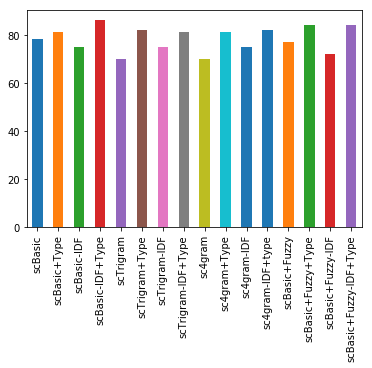

In [114]:
import matplotlib.pyplot as plt

plt.figure()
filtered.loc[132,:].plot(kind='bar')